In [12]:
suppressMessages(library(tidyverse))
suppressMessages(library(tsibble))
suppressMessages(library(fable))
suppressMessages(library(tsibble))
suppressMessages(library(fabletools))
suppressMessages(library(feasts))
suppressMessages(library(lubridate))
suppressMessages(library(dplyr))
suppressMessages(library(scales))
suppressMessages(library(fpp3))
suppressMessages(library(gridExtra))
suppressMessages(library(zoo))
suppressMessages(library(forecast))
getwd()
setwd('C:/Users/janan/Desktop/jupyter_stuff/690')

[1] "C:/Users/janan/Desktop/jupyter_stuff/690"

In [ ]:
df=read.csv('iphone_Sales.csv')

In [1]:
whole_sales_data = ts(
    df$Sales,
    start=c(year(df$Date[0]) , quarter(df$Date[1])),
    frequency = 4
    )
whole_units_data = ts(
    df$Units,
    start=c(year(df$Date[0]) , quarter(df$Date[1])),
    frequency = 4
    )
whole_sales_per_unit_data = ts(
    df$Sales_per_unit,
    start=c(year(df$Date[0]) , quarter(df$Date[1])),
    frequency = 4
    )

ERROR: Error in df$Sales: object of type 'closure' is not subsettable


In [13]:
data = read.csv('train_forecasted_test_2007_2018.csv')
data_to_forecast = read.csv('data_2019_2023.csv')
data$X <- NULL
data_to_forecast$X <- NULL
data <- data %>% mutate(Date =yearquarter( as.yearqtr(Date, format = '%Y Q%q')))
data_to_forecast <- data_to_forecast %>% mutate(Date = yearquarter(as.yearqtr(Date, format = '%Y Q%q')))

data %>% head()
data_to_forecast %>% head()

,Date,Sales,Units,Sales_per_unit
,<qtr>,<dbl>,<dbl>,<dbl>
1,2007 Q3,5,0.27,18.51852
2,2007 Q4,118,1.12,105.35714
3,2008 Q1,241,2.32,103.87931
4,2008 Q2,378,1.70,222.35294
5,2008 Q3,419,0.72,581.94444
6,2008 Q4,806,6.89,116.98113


,Date,Sales,Units,Sales_per_unit
,<qtr>,<int>,<lgl>,<lgl>
1,2019 Q1,51982,NA,NA
2,2019 Q2,31051,NA,NA
3,2019 Q3,25986,NA,NA
4,2019 Q4,33362,NA,NA
5,2020 Q1,55957,NA,NA
6,2020 Q2,28962,NA,NA


In [35]:
par(mfrow = (2,1))
data_sales_ts <- ts(data$Sales, frequency = 4) 
data_sales_ts %>% autoplot()
data_sales_ts %>% diff() %>% autoplot()
par(mfrow = (1,1))
data_units_ts <- ts(data$Units, frequency = 4) 
data_units_ts %>% autoplot()
data_units_ts %>% diff() %>% autoplot()

data_sales_per_unit_ts <- ts(data$Sales_per_unit, frequency = 4) 
data_sales_per_unit_ts %>% autoplot()
data_sales_per_unit_ts %>% diff() %>% autoplot()

ERROR: Error in parse(text = x, srcfile = src): <text>:1:15: unexpected ','
1: par(mfrow = (2,
                  ^


In [14]:
fit <- ts(data$Units, frequency = 4) %>% as_tsibble(index=Date) %>% model(Trend = TSLM(value ~ trend()),`Seasonal Trend` = TSLM(value ~ trend() + season()),SNAIVE = SNAIVE(value))
frcst <- fit %>% forecast(h = 4*5)
data_to_forecast$Forecasted_Units_trend <-frcst %>% as.data.frame() %>% filter(.model== 'Trend') %>% rename('Forecasted_Units_trend'='.mean') %>% select(Forecasted_Units_trend) %>% unlist()
data_to_forecast$Forecasted_Units_seasonal_trend <-frcst %>% as.data.frame() %>% filter(.model== 'Seasonal Trend') %>% rename('Forecasted_Units_seasonal_trend'='.mean') %>% select(Forecasted_Units_seasonal_trend) %>% unlist()
data_to_forecast$Forecasted_Units_snaive <-frcst %>% as.data.frame() %>% filter(.model== 'SNAIVE') %>% rename('Forecasted_Units_snaive'='.mean') %>% select(Forecasted_Units_snaive) %>% unlist()
data_to_forecast %>% head()

,Date,Sales,Units,Sales_per_unit,Forecasted_Units_trend,Forecasted_Units_seasonal_trend,Forecasted_Units_snaive
,<qtr>,<int>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>
1,2019 Q1,51982,NA,NA,75.12734,84.06539,77.08414
2,2019 Q2,31051,NA,NA,76.86784,77.91983,70.93858
3,2019 Q3,25986,NA,NA,78.60834,73.89334,66.91210
4,2019 Q4,33362,NA,NA,80.34883,76.36834,69.38710
5,2020 Q1,55957,NA,NA,82.08933,91.04663,77.08414
6,2020 Q2,28962,NA,NA,83.82983,84.90108,70.93858


In [15]:
data_to_forecast$Sales_per_unit_trend = data_to_forecast$Sales/data_to_forecast$Forecasted_Units_trend
data_to_forecast$Sales_per_unit_seasonal_trend = data_to_forecast$Sales/data_to_forecast$Forecasted_Units_seasonal_trend
data_to_forecast$Sales_per_unit_snaive = data_to_forecast$Sales/data_to_forecast$Forecasted_Units_snaive
forecasted_data <- data_to_forecast

forecasted_data$Units_trend <- forecasted_data$Forecasted_Units_trend
forecasted_data$Units_seasonal_trend <- forecasted_data$Forecasted_Units_seasonal_trend
forecasted_data$Units_snaive <- forecasted_data$Forecasted_Units_snaive
forecasted_data$Forecasted_Units_trend <- NULL
forecasted_data$Forecasted_Units_seasonal_trend <- NULL
forecasted_data$Forecasted_Units_snaive <- NULL
forecasted_data %>% head()

,Date,Sales,Units,Sales_per_unit,Sales_per_unit_trend,Sales_per_unit_seasonal_trend,Sales_per_unit_snaive,Units_trend,Units_seasonal_trend,Units_snaive
,<qtr>,<int>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019 Q1,51982,NA,NA,691.9186,618.3520,674.3540,75.12734,84.06539,77.08414
2,2019 Q2,31051,NA,NA,403.9531,398.4993,437.7167,76.86784,77.91983,70.93858
3,2019 Q3,25986,NA,NA,330.5756,351.6690,388.3603,78.60834,73.89334,66.91210
4,2019 Q4,33362,NA,NA,415.2145,436.8564,480.8099,80.34883,76.36834,69.38710
5,2020 Q1,55957,NA,NA,681.6598,614.5971,725.9210,82.08933,91.04663,77.08414
6,2020 Q2,28962,NA,NA,345.4856,341.1264,408.2686,83.82983,84.90108,70.93858


In [30]:
fit <- ts(data$Sales, frequency = 4) %>% as_tsibble(index=Date) %>% model(Trend = TSLM(value ~ trend()),`Seasonal Trend` = TSLM(value ~ trend() + season()),SNAIVE = SNAIVE(value))
frcst <- fit %>% forecast(h = 4*5)
data_to_forecast$Forecasted_Sales_trend <-frcst %>% as.data.frame() %>% filter(.model== 'Trend') %>% rename('Forecasted_sales_trend'='.mean') %>% select(Forecasted_sales_trend) %>% unlist()
data_to_forecast$Forecasted_Sales_seasonal_trend <-frcst %>% as.data.frame() %>% filter(.model== 'Seasonal Trend') %>% rename('Forecasted_sales_seasonal_trend'='.mean') %>% select(Forecasted_sales_seasonal_trend) %>% unlist()
data_to_forecast$Forecasted_Sales_snaive <-frcst %>% as.data.frame() %>% filter(.model== 'SNAIVE') %>% rename('Forecasted_sales_snaive'='.mean') %>% select(Forecasted_sales_snaive) %>% unlist()


fit <- ts(data$Units, frequency = 4) %>% as_tsibble(index=Date) %>% model(Trend = TSLM(value ~ trend()),`Seasonal Trend` = TSLM(value ~ trend() + season()),SNAIVE = SNAIVE(value))
frcst <- fit %>% forecast(h = 4*5)
data_to_forecast$Forecasted_Units_trend <-frcst %>% as.data.frame() %>% filter(.model== 'Trend') %>% rename('Forecasted_Units_trend'='.mean') %>% select(Forecasted_Units_trend) %>% unlist()
data_to_forecast$Forecasted_Units_seasonal_trend <-frcst %>% as.data.frame() %>% filter(.model== 'Seasonal Trend') %>% rename('Forecasted_Units_seasonal_trend'='.mean') %>% select(Forecasted_Units_seasonal_trend) %>% unlist()
data_to_forecast$Forecasted_Units_snaive <-frcst %>% as.data.frame() %>% filter(.model== 'SNAIVE') %>% rename('Forecasted_Units_snaive'='.mean') %>% select(Forecasted_Units_snaive) %>% unlist()


fit <- ts(data$Sales_per_unit, frequency = 4) %>% as_tsibble(index=Date) %>% model(Trend = TSLM(value ~ trend()),`Seasonal Trend` = TSLM(value ~ trend() + season()),SNAIVE = SNAIVE(value))
frcst <- fit %>% forecast(h = 4*5)
data_to_forecast$Forecasted_Sales_per_unit_trend <-frcst %>% as.data.frame() %>% filter(.model== 'Trend') %>% rename('Forecasted_Sales_per_unit_trend'='.mean') %>% select(Forecasted_Sales_per_unit_trend) %>% unlist()
data_to_forecast$Forecasted_Sales_per_unit_seasonal_trend <-frcst %>% as.data.frame() %>% filter(.model== 'Seasonal Trend') %>% rename('Forecasted_Sales_per_unit_seasonal_trend'='.mean') %>% select(Forecasted_Sales_per_unit_seasonal_trend) %>% unlist()
data_to_forecast$Forecasted_Sales_per_unit_snaive <-frcst %>% as.data.frame() %>% filter(.model== 'SNAIVE') %>% rename('Forecasted_Sales_per_unit_snaive'='.mean') %>% select(Forecasted_Sales_per_unit_snaive) %>% unlist()



data_to_forecast %>% head()

,Date,Sales,Units,Sales_per_unit,Forecasted_Units_trend,Forecasted_Units_seasonal_trend,Forecasted_Units_snaive,Sales_per_unit_trend,Sales_per_unit_seasonal_trend,Sales_per_unit_snaive,Forecasted_Sales_trend,Forecasted_Sales_seasonal_trend,Forecasted_Sales_snaive,Forecasted_Sales_per_unit_trend,Forecasted_Sales_per_unit_seasonal_trend,Forecasted_Sales_per_unit_snaive
,<qtr>,<int>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019 Q1,51982,NA,NA,75.12734,84.06539,77.08414,691.9186,618.3520,674.3540,48446.31,55188.88,50620.99,821.3589,861.2101,823.0953
2,2019 Q2,31051,NA,NA,76.86784,77.91983,70.93858,403.9531,398.4993,437.7167,49584.38,50279.33,45711.44,830.8470,853.0785,814.9637
3,2019 Q3,25986,NA,NA,78.60834,73.89334,66.91210,330.5756,351.6690,388.3603,50722.44,47365.36,42797.47,840.3352,833.0785,794.9637
4,2019 Q4,33362,NA,NA,80.34883,76.36834,69.38710,415.2145,436.8564,480.8099,51860.51,48774.96,44207.07,849.8234,804.0599,765.9451
5,2020 Q1,55957,NA,NA,82.08933,91.04663,77.08414,681.6598,614.5971,725.9210,52998.57,59756.77,50620.99,859.3116,899.3249,823.0953
6,2020 Q2,28962,NA,NA,83.82983,84.90108,70.93858,345.4856,341.1264,408.2686,54136.64,54847.21,45711.44,868.7998,891.1933,814.9637


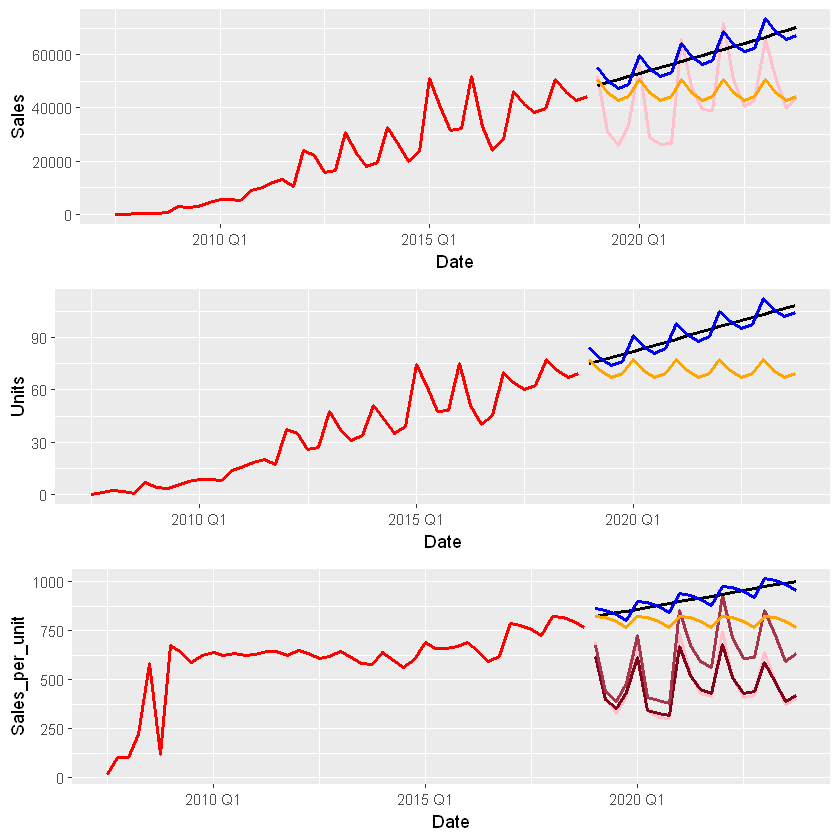

In [28]:
p1 <- ggplot() +
    geom_line(data = data, aes(x = Date, y = Sales), color = 'red',size=1) +
    geom_line(data = data_to_forecast, aes(x = Date, y = Sales), color= 'pink', size=1)+ ## Sales from the dataset
    geom_line(data =data_to_forecast, aes(x = Date, y = Forecasted_Sales_trend), color= 'black', size=1)+
    geom_line(data =data_to_forecast, aes(x = Date, y = Forecasted_Sales_seasonal_trend), color= 'blue', size=1)+
    geom_line(data =data_to_forecast, aes(x = Date, y = Forecasted_Sales_snaive), color= 'orange', size=1)
    
p2 <- ggplot() +
    geom_line(data = data, aes(x = Date, y = Units), color = 'red', size=1)+
    geom_line(data = data_to_forecast, aes(x = Date, y = Forecasted_Units_trend), color= 'black', size=1)+
    geom_line(data = data_to_forecast, aes(x = Date, y = Forecasted_Units_seasonal_trend), color= 'blue', size=1)+
    geom_line(data = data_to_forecast, aes(x = Date, y = Forecasted_Units_snaive), color= 'orange', size=1)
    

p3 <- ggplot() +
    geom_line(data = data, aes(x = Date, y = Sales_per_unit), color = 'red', size=1)+
    geom_line(data = forecasted_data, aes(x = Date,y = Sales_per_unit_trend),color='pink',size = 1) + ## Sales_per_unit using given sales and forecasted units
    geom_line(data = forecasted_data, aes(x = Date,y = Sales_per_unit_seasonal_trend),color='#820419',size = 1) + ## Sales_per_unit using given sales and forecasted units
    geom_line(data = forecasted_data, aes(x = Date,y = Sales_per_unit_snaive),color='#a63649',size = 1) + ## Sales_per_unit using given sales and forecasted units
    geom_line(data = data_to_forecast, aes(x = Date, y = Forecasted_Sales_per_unit_trend), color= 'black', size=1)+
    geom_line(data = data_to_forecast, aes(x = Date, y = Forecasted_Sales_per_unit_seasonal_trend), color= 'blue', size=1)+
    geom_line(data = data_to_forecast, aes(x = Date, y = Forecasted_Sales_per_unit_snaive), color= 'orange', size=1)



grid.arrange(p1,p2,p3,ncol=1)

the Seasonal Trend model may provide the most reliable forecast due to its consideration of both trend and seasonality, which are evident in the historical data.

#### Using Forecasted_data after the analysis from this approach

In [18]:
forecasted_data %>% head()

,Date,Sales,Units,Sales_per_unit,Sales_per_unit_trend,Sales_per_unit_seasonal_trend,Sales_per_unit_snaive,Units_trend,Units_seasonal_trend,Units_snaive
,<qtr>,<int>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019 Q1,51982,NA,NA,691.9186,618.3520,674.3540,75.12734,84.06539,77.08414
2,2019 Q2,31051,NA,NA,403.9531,398.4993,437.7167,76.86784,77.91983,70.93858
3,2019 Q3,25986,NA,NA,330.5756,351.6690,388.3603,78.60834,73.89334,66.91210
4,2019 Q4,33362,NA,NA,415.2145,436.8564,480.8099,80.34883,76.36834,69.38710
5,2020 Q1,55957,NA,NA,681.6598,614.5971,725.9210,82.08933,91.04663,77.08414
6,2020 Q2,28962,NA,NA,345.4856,341.1264,408.2686,83.82983,84.90108,70.93858


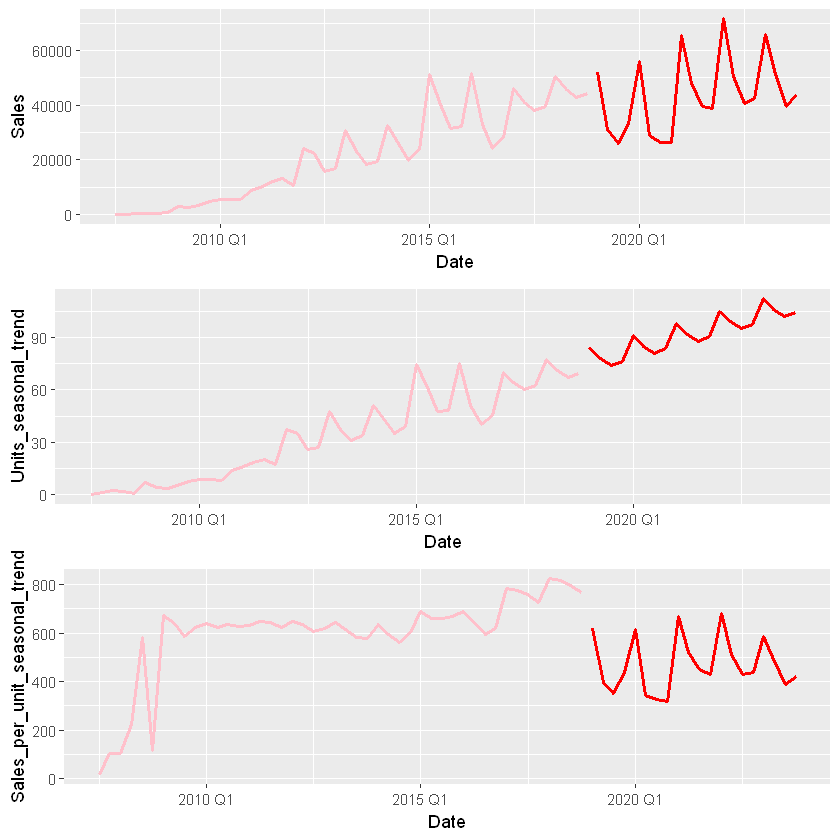

In [19]:
p1 <- ggplot() +
    geom_line(data = forecasted_data, aes(x = Date, y = Sales_per_unit_seasonal_trend), color = 'red',size=1)+
    geom_line(data = data, aes(x = Date, y = Sales_per_unit), color = 'pink',size=1)

p2 <- ggplot()+
    geom_line(data = forecasted_data, aes(x = Date, y = Units_seasonal_trend),color='red',size = 1)+
    geom_line(data = data, aes(x = Date, y = Units), color = 'pink', size = 1)

p3 <- ggplot()+
    geom_line(data = forecasted_data, aes(x = Date, y = Sales), color = 'red', size = 1)+
    geom_line(data = data, aes(x = Date, y = Sales), color = 'pink', size = 1)

grid.arrange(p3,p2,p1,ncol=1)

finalized_data <- forecasted_data %>% select(Date,Sales,Units_seasonal_trend,Sales_per_unit_seasonal_trend) %>% rename(
    Units = Units_seasonal_trend,
    Sales_per_unit = Sales_per_unit_seasonal_trend
)
combined_df = rbind(data, finalized_data)

In [23]:
fit_sales <- ts(combined_df$Sales, frequency = 4) %>% as_tsibble(index=Date) %>% model(Trend = TSLM(value ~ trend()),`Seasonal Trend` = TSLM(value ~ trend() + season()),SNAIVE = SNAIVE(value))
fit_units <- ts(combined_df$Units, frequency = 4) %>% as_tsibble(index=Date) %>% model(Trend = TSLM(value ~ trend()),`Seasonal Trend` = TSLM(value ~ trend() + season()),SNAIVE = SNAIVE(value))
fit_Sales_per_unit <- ts(combined_df$Sales_per_unit, frequency = 4) %>% as_tsibble(index=Date) %>% model(Trend = TSLM(value ~ trend()),`Seasonal Trend` = TSLM(value ~ trend() + season()),SNAIVE = SNAIVE(value))

frcst_sales <- fit_sales %>% forecast(h = 4*2) 
frcst_units <- fit_units %>% forecast(h = 4*2)
frcst_sales_per_unit <- fit_Sales_per_unit %>% forecast(h = 4*2)

future <- data.frame(Date = c('2024 Q1', '2024 Q2', '2024 Q3', '2024 Q4','2025 Q1', '2025 Q2', '2025 Q3', '2025 Q4'))

future$sales_trend <- frcst_sales %>% as.data.frame() %>% filter(.model == 'Trend') %>% select(.mean) %>% rename('sales_trend' = .mean) %>% unlist()
future$units_trend <- frcst_units %>% as.data.frame() %>% filter(.model == 'Trend') %>% select(.mean) %>% rename('units_trend' = .mean) %>% unlist()
future$sales_per_unit_trend <- frcst_sales_per_unit %>% as.data.frame() %>% filter(.model == 'Trend') %>% select(.mean) %>% rename('sales_per_unit' = .mean) %>% unlist()


future$sales_seasonal_trend <- frcst_sales %>% as.data.frame() %>% filter(.model == 'Seasonal Trend') %>% select(.mean) %>% rename('sales_seasonal_trend' = .mean) %>% unlist()
future$units_seasonal_trend <- frcst_units %>% as.data.frame() %>% filter(.model == 'Seasonal Trend') %>% select(.mean) %>% rename('units_seasonal_trend' = .mean) %>% unlist()
future$sales_per_unit_seasonal_trend <- frcst_sales_per_unit %>% as.data.frame() %>% filter(.model == 'Seasonal Trend') %>% select(.mean) %>% rename('sales_per_unit_seasonal_trend' = .mean) %>% unlist()


future$sales_snaive <- frcst_sales %>% as.data.frame() %>% filter(.model == 'SNAIVE') %>% select(.mean) %>% rename('sales_snaive' = .mean) %>% unlist()
future$units_snaive <- frcst_units %>% as.data.frame() %>% filter(.model == 'SNAIVE') %>% select(.mean) %>% rename('units_snaive' = .mean) %>% unlist()
future$sales_per_unit_snaive <- frcst_sales_per_unit %>% as.data.frame() %>% filter(.model == 'SNAIVE') %>% select(.mean) %>% rename('sales_per_unit_snaive' = .mean) %>% unlist()
future <- future %>% mutate(Date = yearquarter(as.yearqtr(Date, format = '%Y Q%q')))

In [24]:
str(future)
str(finalized_data)

'data.frame':	8 obs. of  10 variables:
 $ Date                         : qtr [1:8] 2024 Q1, 2024 Q2, 2024 Q3, 2024 Q4, 2025 Q1, 2025 Q2, 2025 Q...
   ..@ fiscal_start: num 1
 $ sales_trend                  : num  56364 57198 58032 58866 59699 ...
 $ units_trend                  : num  110 112 114 115 117 ...
 $ sales_per_unit_trend         : num  586 587 588 589 589 ...
 $ sales_seasonal_trend         : num  66991 57298 52744 54491 70339 ...
 $ units_seasonal_trend         : num  119 113 109 111 126 ...
 $ sales_per_unit_seasonal_trend: num  661 598 557 542 664 ...
 $ sales_snaive                 : num  65775 51334 39669 43805 65775 ...
 $ units_snaive                 : num  112 106 102 104 112 ...
 $ sales_per_unit_snaive        : num  587 485 390 420 587 ...
'data.frame':	20 obs. of  4 variables:
 $ Date          : qtr [1:20] 2019 Q1, 2019 Q2, 2019 Q3, 2019 Q4, 2020 Q1, 2020 Q2, 2020 ...
   ..@ fiscal_start: num 1
 $ Sales         : int  51982 31051 25986 33362 55957 28962 26418 2644

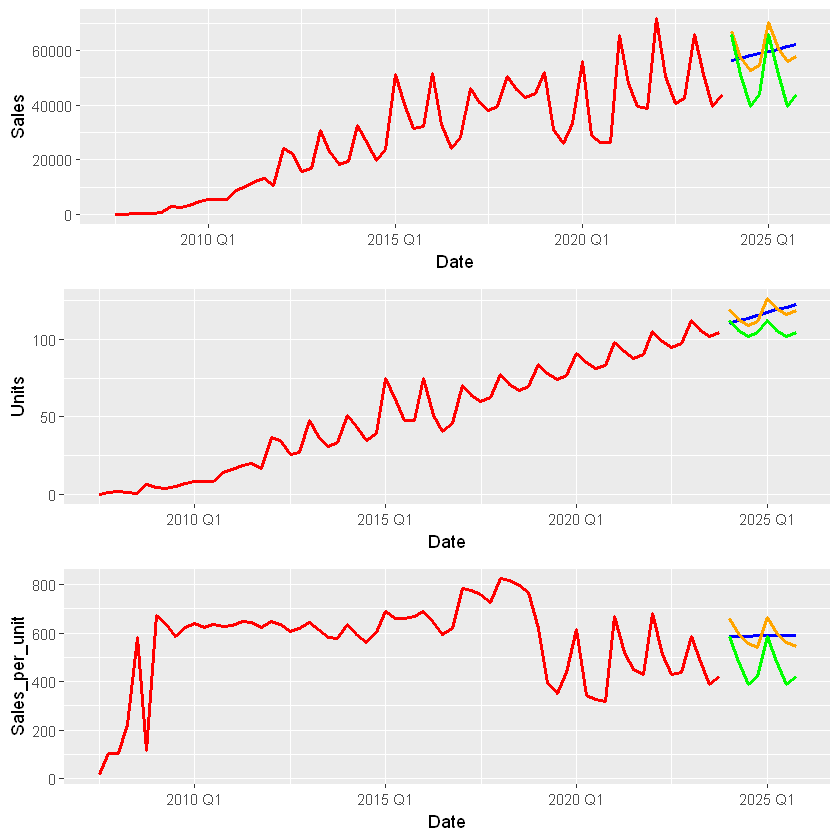

In [25]:
p1 <- ggplot()+
    geom_line(data = combined_df, aes(x = Date, y = Sales),color = 'red', size = 1)+
    geom_line(data = future, aes(x = Date,y = sales_trend), color = 'blue',size = 1)+
    geom_line(data = future, aes(x = Date, y = sales_seasonal_trend), color = 'orange', size = 1)+
    geom_line(data = future, aes(x = Date, y = sales_snaive), color = 'green', size = 1)
p2 <- ggplot()+
    geom_line(data = combined_df, aes(x = Date, y = Units), color = 'red',size = 1)+
    geom_line(data = future, aes(x = Date,y = units_trend), color = 'blue',size = 1)+
    geom_line(data = future, aes(x = Date, y = units_seasonal_trend), color = 'orange', size = 1)+
    geom_line(data = future, aes(x = Date, y = units_snaive), color = 'green', size = 1)

p3 <- ggplot()+
    geom_line(data = combined_df, aes(x = Date,y = Sales_per_unit),color= 'red', size = 1)+
    geom_line(data = future, aes(x = Date,y = sales_per_unit_trend), color = 'blue',size = 1)+
    geom_line(data = future, aes(x = Date, y = sales_per_unit_seasonal_trend), color = 'orange', size = 1)+
    geom_line(data = future, aes(x = Date, y = sales_per_unit_snaive), color = 'green', size = 1)
grid.arrange(p1,p2,p3,ncol=1)

Based on the provided plot and previous information, the `Seasonal Trend` model appears to perform well, striking a balance between capturing the underlying trend and adjusting for seasonal fluctuations. In the plot, this model's forecasts (indicated in blue for trend and orange for seasonal adjustments) seem to align closely with historical data trends and seasonal patterns, suggesting its effectiveness in accounting for both long-term and cyclical changes. The seasonal trend model demonstrates adaptability to the sales cycles' peaks and troughs, which is crucial for accurate forecasting in data with strong seasonal components.

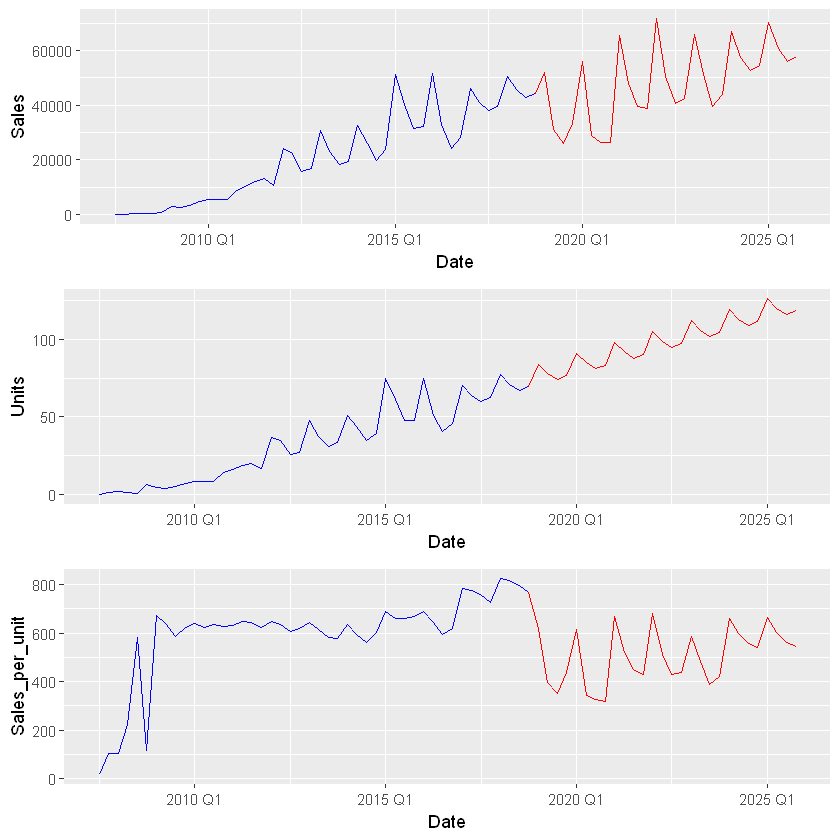

In [26]:
new_df_with_future_data <- future %>% 
    select(Date, sales_seasonal_trend,units_seasonal_trend,sales_per_unit_seasonal_trend) %>%
    rename('Sales' = sales_seasonal_trend) %>%
    rename('Units' = units_seasonal_trend) %>%
    rename('Sales_per_unit' = sales_per_unit_seasonal_trend)

final <- rbind(combined_df,new_df_with_future_data)
p1 <- ggplot()+
    geom_line(data = final,aes(x = Date,y = Sales),color = 'red') +
    geom_line(data = data,aes(x = Date,y = Sales), color = 'blue')

p2 <- ggplot()+
    geom_line(data = final,aes(x = Date,y = Units),color = 'red') +
    geom_line(data = data,aes(x = Date,y = Units), color = 'blue')

p3 <- ggplot()+
    geom_line(data = final,aes(x = Date,y = Sales_per_unit),color = 'red') +
    geom_line(data = data,aes(x = Date,y = Sales_per_unit), color = 'blue')

grid.arrange(p1,p2,p3,ncol=1)

In [36]:
write.csv(final,'final.csv')